<h1>Tutoriel : Installation et utilisation de <span style = "color: blue;">UNLocBoX</span> sur MATLAB</h1>

<h2>I - INTRODUCTION</h2>

  De nos jours, la tendance pour résoudre les problèmes d'optimisation est d'utiliser des algorithmes spécifiques plutôt que des méthodes très générales. UNLocBoX fournit un cadre général permettant à l'utilisateur de concevoir ses propres algorithmes. Pour ce faire, le cadre tente de rester aussi proche que possible du problème mathématique. UNLocBoX est une boîte à outils MATLAB conçue pour résoudre des problèmes d'optimisation convexe.
  
UNLocBoX apparait pour resoudre le dilemme de <strong>"J'ai besoin d'un algorithme specifique pour resoudre mon probleme mais, je n'ai pas envie de passer des heures à l'écrire"</strong>.  

Plus précisément UNLocBoX sert a resoudre les problème d'optimisation convexe de la forme

$$\min_{x \in C} \sum_{n=1}^{K}f_n(x)$$
utilisant des techniques de décomposition proximale. Il se compose principalement de solveurs, d'opérateurs proximaux et de fichiers de démonstration, permettant à l'utilisateur d'implémenter rapidement un problème.

<h2>II - Guide d'intallation</h2>

<h3>Prerequis</h3>
<ul>
    <li>Avoir MATLAB deja installé</li>
</ul>
<h3>Installation</h3>
<ol>
    <li>Telecharger la derniere version de UNLocBoX pour votre systeme sur <a href="https://lts2.epfl.ch/unlocbox/download.php">https://lts2.epfl.ch/unlocbox/download.php</a></li>
    <li>Extraire l'archive dans le repertoire de votre choix</li>
    <li>Ajouter le dossier au path MATLAB : addpath(genpath('/chemin/vers/UNLocBoX')) et sauvegarder avc savepath</li>
    <li>Enfin, pour démarrer la boîte à outils, exécutez simplement la fonction init_unlocbox.m à la racine du répertoire UNLocBoX</li>
</ol>

<h2>III - Utilisation de UNLocBoX</h2>

<h3>a - Proximaux elementaires</h3>

Définition : pour une fonction convexe propre $f : R^n → R ∪ {+∞}$  et un paramètre  $τ > 0$, le prox de f à l’échelle τ est : $prox_{τ f}(x) = argmin_y (1/2) ||y − x||_2^2 + τ f(y)$.
<p>Prox de la norme l1 (sparsité) : $prox_{λ||·||1}(x) = soft-thresholding(x, λ)$</p>
<p>Prox de la donnée l2 (term de fidélité quadratique) : $prox_{μ/2||x-y||^2}(x) = (x + μ y)/(1+μ)$</p>

In [1]:
init_unlocbox
z = [-2; 0.5; 3; -0.1];
lambda = 0.8;

%  prox_l1 :
x = prox_l1(z, lambda);
y = prox_l2(z, lambda);

UnLocBoX version 1.7.5. Copyright 2012-2015 LTS2-EPFL, by Nathanael Perraudin
  prox_L1: ||A x-y||_1 = 2.720000e+00, REL_OB, iter = 2
  prox_L2: ||w (A x- y) ||_2^2 = 4.080000e+00, REL_OB, iter = 1


<h3>b - solvers</h3>
UNLocBoX est composé de plusieurs Solveurs catégorisé en 2 groupes.
<ul>
    <li>Les solveurs qui minimise seulement 2 fonctions (Forward backward, Douglas Rachford,ADMM,...)</li>
    <li>Les solveurs plus generaux mais moins efficients (Generalized forward backward, PPXA, SDMM,...)</li>
</ul>

<h4>Exemple avec un solveur qui minimise 2 fonctions</h4>

Cherchons a minimiser la somme des fonctions :

$f_1(x) = \frac{1}{2}|A x - b|_2^2$  (differentiable)

$f_2(x) = \lambda|x|_1$  (non différentiable, mais proximale connue)

1. On commence par creer des donnees

In [2]:
n = 50;  % taille du vecteur inconnu x
m = 30;  % nombre de mesures

A = randn(m, n);
x_true = sprandn(n, 1, 0.2);      % vecteur vrai, creux
b = A * x_true + 0.01 * randn(m,1); % données bruitées

2. Ensuite on defini les fonctions $f_1(x)$ et $f_2(x)$

In [3]:
% f1(x) = 0.5 * ||A*x - b||_2^2
f1.grad = @(x) A' * (A*x - b);           % gradient
f1.eval = @(x) 0.5 * norm(A*x - b)^2;    % valeur
f1.beta = norm(A)^2;                     % Lipschitz constant

% f2(x) = lambda * ||x||_1
lambda = 0.1;
f2.prox = @(x, T) soft_thresh(x, lambda*T);
f2.eval = @(x) lambda * norm(x, 1);

3. On parametre et on lance le solveur

   <b>param.verbose = x;</b>
   
        → Contrôle le niveau d’affichage des informations pendant les itérations.
   
                           x = 0   → Aucune sortie (mode silencieux)
   
                           x = 1   → Affiche des infos de base à chaque itération (par défaut)
   
                           x = 2   → Affiche plus de détails (valeurs des fonctions, convergence, etc.)
   

    <b>param.maxit</b> : Ca correspond au nombre maximal d'iterations.
   
    <b>param.tol</b> : Correspond à la tolérance sur le critère d’arrêt (la précision demandée).
   
    <b>param.gamma</b> : C'est le pas du gradient (step size) pour la partie différentiable.
   
   Ces paramètres contrôlent le comportement du solveur dans UNLocBoX (et plus largement dans les algorithmes de minimisation itératifs).
   
   <b>NB :</b> Dans notre cas, la fonction <b>solvep</b> de UNLocBoX utilise automatiquement le solveur Forward_backward car une fonction est differentiable et l'autre non

In [4]:
% -------------------------
% Fonction utilitaire
% -------------------------
function y = soft_thresh(x, T)
    y = sign(x) .* max(abs(x) - T, 0);
end
% -------------------------
%  Paramètres du solveur
% -------------------------
param.verbose = 1;
param.maxit = 200;
param.tol = 1e-6;
param.gamma = 1 / f1.beta;

x0 = zeros(n,1);  % point de départ !

% -------------------------
%  Lancement du solveur
% -------------------------
[x_est, info] = solvep(x0, {f1, f2}, param);

The time step is set manually to : 0.00621317
FORWARD_BACKWARD  f(x^*) = 1.203101e+00, rel_eval = 1.343277e-03, it = 200, MAX_IT


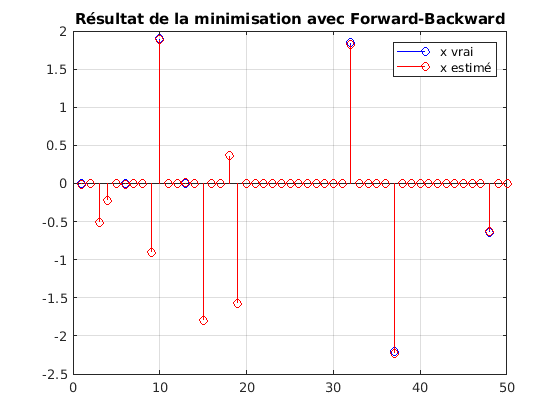

In [5]:
% -------------------------
% Affichage
% -------------------------
figure;
stem(x_true, 'b', 'DisplayName', 'x vrai'); hold on;
stem(x_est, 'r', 'DisplayName', 'x estimé');
legend; grid on;
title('Résultat de la minimisation avec Forward-Backward');




<h4>Exemple avec un solveur plus generique</h4>

Cherchons a minimiser la somme des fonctions :

$f_1(x) = \frac{1}{2}|A x - b|_2^2$  (differentiable)

$f_2(x) = \lambda|x|_1$  (proximale l1)

$f_3(x) = \lambda|x|_2^2$  (proximale l2)

On commence par la creation des donnees et la definitions des fonctions

In [6]:
% 1. Création des données
% -------------------------
n = 50;  % taille du vecteur inconnu x
m = 30;  % nombre de mesures

A = randn(m, n);
x_true = sprandn(n, 1, 0.2);      % vecteur vrai, creux
b = A*x_true + 0.01*randn(m,1);   % données bruitées

% 2. Définition des fonctions
% -------------------------

% f1(x) = 1/2 * ||A*x - b||_2^2  (différentiable)
f1.grad = @(x) A'*(A*x - b);
f1.eval = @(x) 0.5*norm(A*x - b)^2;
f1.beta = norm(A)^2;  % constante Lipschitz

% f2(x) = lambda1 * ||x||_1  (proximal)
lambda1 = 0.1;
f2.prox = @(x,T) soft_thresh(x, lambda1*T);
f2.eval = @(x) lambda1*norm(x,1);

% f3(x) = lambda2 * ||x||_2^2  (proximal simple)
lambda2 = 0.05;
f3.prox = @(x,T) x / (1 + 2*lambda2*T);  % formule analytique du prox
f3.eval = @(x) lambda2*norm(x)^2;

Ensuite on parametre le solveur avant de le lancer

In [7]:
% Fonction utilitaire : soft-thresholding
% -------------------------
function y = soft_thresh(x,T)
    y = sign(x).*max(abs(x)-T,0);
end

% 3. Paramètres du solveur
% -------------------------
param.verbose = 1;          % afficher la convergence
param.maxit = 200;          % nombre max d'itérations
param.tol = 1e-6;           % tolérance pour arrêter
param.gamma = 1/f1.beta;    % pas du gradient (Forward step)

x0 = zeros(n,1);            % point initial

% 4. Lancer le solveur GFB
% -------------------------
% Ici, on utilise solvep avec 'gfb'(selectionner automatiquement) qui accepte plusieurs fonctions proximales
[x_est, info] = solvep(x0, {f1, f2, f3}, param);

The time step is set manually to : 0.00805115
FB_BASED_PRIMAL_DUAL   Rel primal: 1.096354e-03, rel dual 1.094634e-03, it = 200, MAX_IT


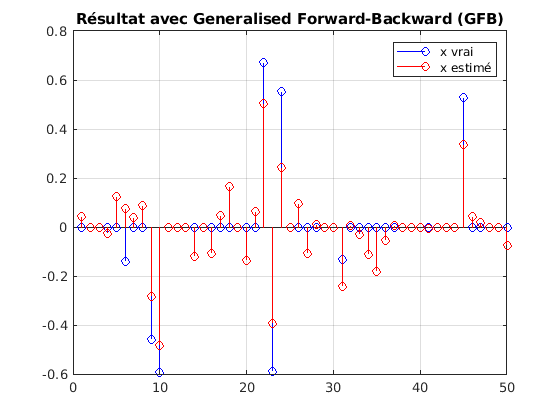

In [8]:
% 5. Affichage des résultats
% -------------------------
figure;
stem(x_true, 'b', 'DisplayName', 'x vrai'); hold on;
stem(x_est, 'r', 'DisplayName', 'x estimé');
legend; grid on;
title('Résultat avec Generalised Forward-Backward (GFB)');